In [2]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tqdm import tqdm


In [82]:
df = pd.read_csv('../data/cl_papers.csv', index_col=0)
df

,id,title,area,source,year,doi,abstract,semantic_scholar_id
0,main.1004,AnswerFact: Fact Checking in Product Question ...,Question Answering,EMNLP,2020,10.18653/v1/2020.emnlp-main.188,Product-related question answering platforms n...,4c61df1b4b9a164fec1a34587b4fffae029cd18c
1,main.1006,Knowledge-Grounded Dialogue Generation with Pr...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.272,We study knowledge-grounded dialogue generatio...,3447a432f724aa36595643446acda5b78943db19
2,main.1009,BiST: Bi-directional Spatio-Temporal Reasoning...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.145,Video-grounded dialogues are very challenging ...,f4a2acfeb1705df3f430cc53ace26e1dbbbcbd16
3,main.1010,A Knowledge-Aware Sequence-to-Tree Network for...,NLP Applications,EMNLP,2020,10.18653/v1/2020.emnlp-main.579,With the advancements in natural language proc...,24ed85ad966823868c1694a19385d01c6ad71008
4,main.1011,Knowledge Association with Hyperbolic Knowledg...,Information Extraction,EMNLP,2020,10.18653/v1/2020.emnlp-main.460,Capturing associations for knowledge graphs (K...,3d61a28b9429fc8f7047fc379a0134a3765edbcb
...,...,...,...,...,...,...,...,...
9250,T4773,Rank-Aware Negative Training for Semi-Supervis...,Machine Learning for NLP,ACL,2023,10.1162/tacl_a_00574,Abstract Semi-supervised text classification-b...,79a502caa0b12573f56a7e8948459722aa891479
9251,T4777,Transparency Helps Reveal When Language Models...,"Linguistic Theories, Cognitive Modeling, and P...",ACL,2023,10.1162/tacl_a_00565,Many current NLP systems are built from langua...,eee70790ced38b0fcf50351dbb3dcbdb582467e8
9252,T4803,Design Choices for Crowdsourcing Implicit Disc...,Discourse and Pragmatics,ACL,2023,10.1162/tacl_a_00586,Abstract Disagreement in natural language anno...,bf65a1b637e0f253abb8402fc9d0ab80db79aa92
9253,T4929,Time-and-Space-Efficient Weighted Deduction,"Semantics: Sentence-level Semantics, Textual I...",ACL,2023,10.1162/tacl_a_00588,Abstract Many NLP algorithms have been describ...,f1803d124e5af7263ce656f7ccf3219eacc62b1c


In [139]:
mapping = {
  'Applications': 'Applications',
  'Cognitive Modeling and Psycholinguistics': 'Linguistic Theories and Psycholinguistics',
  'Commonsense Reasoning': 'Commonsense Reasoning',
  'Computational Social Science and Cultural Analytics': 'Social Science',
  'Computational Social Science and Social Media': 'Social Science',
  'Dialog and Interactive Systems': 'Dialogue',
  'Dialogue and Interactive Systems': 'Dialogue',
  'Discourse and Pragmatics': 'Discourse and Pragmatics',
  'Discourse and Pragmatics & Ethics in NLP': 'Discourse and Pragmatics',
  'Efficient Methods for NLP': 'Efficient Methods',
  'Ethic Concerns:Dialogue and Interactive Systems': 'Ethics',
  'Ethic Concerns:Ethics': 'Ethics',
  'Ethic Concerns:Linguistic Theories, Cognitive Modeling and Psycholinguistics': 'Ethics',
  'Ethic Concerns:Multilinguality': 'Ethics',
  'Ethic Concerns:NLP Applications': 'Ethics',
  'Ethic Concerns:Resources and Evaluation': 'Ethics',
  'Ethic Concerns:Sentiment Analysis, Stylistic Analysis, and Argument Mining': 'Ethics',
  'Ethic Concerns:Speech, Vision, Robotics, Multimodal Grounding': 'Ethics',
  'Ethic Concerns:Unsupervised and Weakly-Supervised Methods in NLP': 'Ethics',
  'Ethics': 'Ethics',
  'Ethics and NLP': 'Ethics',
  'Ethics in NLP': 'Ethics',
  'Generation': 'Generation',
  'Human-Centered NLP': 'Human-Centered NLP',
  'Industry': 'Industry',
  'Information Extraction': 'Information Extraction/Retrieval',
  'Information Retrieval and Text Mining': 'Information Extraction/Retrieval',
  'Interpretability and Analysis of Models for NLP': 'Interpretability and Analysis',
  'Interpretability, Interactivity and Analysis of Models for NLP': 'Interpretability and Analysis',
  'Interpretability, Interactivity, and Analysis of Models for NLP': 'Interpretability and Analysis',
  'Language Generation': 'Generation',
  'Language Grounding to Vision, Robotics and Beyond': 'Multimodality, Speech and Grounding',
  'Language Grounding to Vision, Robotics, and Beyond': 'Multimodality, Speech and Grounding',
  'Language Groundings, Speech and Multimodality': 'Multimodality, Speech and Grounding',
  'Language Modeling and Analysis of Language Models': 'Interpretability and Analysis',
  'Large Language Models': 'Large Language Models',
  'Linguistic Diversity': 'Machine Translation and Multilinguality',
  'Linguistic Theories, Cognitive Modeling and Psycholinguistics': 'Linguistic Theories and Psycholinguistics',
  'Linguistic Theories, Cognitive Modeling, and Psycholinguistics': 'Linguistic Theories and Psycholinguistics',
  'Machine Learning for NLP': 'Machine Learning',
  'Machine Translation': 'Machine Translation and Multilinguality',
  'Machine Translation and Multilinguality': 'Machine Translation and Multilinguality',
  'Multidisciplinary and Area Chair COI': 'Theme',
  'Multilingualism and Cross-Lingual NLP': 'Machine Translation and Multilinguality',
  'Multilinguality': 'Machine Translation and Multilinguality',
  'Multilinguality and Linguistic Diversity': 'Machine Translation and Multilinguality',
  'NLP Applications': 'Applications',
  'Natural Language Generation': 'Generation',
  'Phonology, Morphology and Word Segmentation': 'Phonology, Morphology and Word Segmentation',
  'Phonology, Morphology, and Word Segmentation': 'Phonology, Morphology and Word Segmentation',
  'Question Answering': 'Question Answering',
  'Resources and Evaluation': 'Resources and Evaluation',
  'Semantics': 'Semantics',
  'Semantics: Lexical': 'Semantics',
  'Semantics: Lexical Semantics': 'Semantics',
  'Semantics: Lexical, Sentence level, Document Level, Textual Inference, etc.': 'Semantics',
  'Semantics: Lexical, Sentence level, Textual Inference and Other areas': 'Semantics',
  'Semantics: Sentence Level': 'Semantics',
  'Semantics: Sentence-level Semantics, Textual Inference and Other areas': 'Semantics',
  'Semantics: Sentence-level Semantics, Textual Inference, and Other Areas': 'Semantics',
  'Semantics: Textual Inference and Other Areas of Semantics': 'Semantics',
  'Sentiment Analysis, Stylistic Analysis, and Argument Mining': 'Sentiment Analysis',
  'Special Theme on Language Diversity: From Low Resource to Endangered': 'Theme',
  'Speech and Multimodality': 'Multimodality, Speech and Grounding',
  'Speech, Vision, Robotics, Multimodal Grounding': 'Multimodality, Speech and Grounding',
  'Summarization': 'Summarization',
  'Syntax, Parsing and their Applications': 'Syntax',
  'Syntax: Tagging, Chunking and Parsing': 'Syntax',
  'Syntax: Tagging, Chunking, and Parsing': 'Syntax',
  'Theme': 'Theme',
  'Theme Track': 'Theme',
  'Theme Track: Large Language Models and the Future of NLP': 'Theme',
  'Theme: Reality Check': 'Theme',
  'Theory and Formalism in NLP (Linguistic and Mathematical)': 'Theory and Formalism in NLP',
  'Unsupervised and Weakly-Supervised Methods in NLP': 'Unsupervised and Weakly-Supervised Methods in NLP',
#### pre 2020 ###
'Area A (Information Extraction and Question Answering) [LONG]': None,
  'Area A from Area F (Discourse, Dialog, Summarization, Generation, Multimodal NLP) [LONG]': None,
  'Area B (Text Mining and Information Retrieval) [LONG]': 'Information Extraction/Retrieval',
  'Area C (Social Media, Computational Social Science, Sentiment,  Opinion) [LONG]': 'Social Science',
  'Area D (Morphology, Syntax, Chunking, Psycholinguistics) [LONG]': 'Syntax',
  'Area E (Semantics) [LONG]': 'Semantics',
  'Area F (Discourse, Dialog, Summarization, Generation, Multimodal NLP) [LONG]': None,
  'Area G (Machine Translation and Multilinguality) [LONG]': None,
  'Area H (Machine Learning) [LONG]': 'Machine Learning',
  'Area H or D': None,
  'Argument Mining': None,
  'Best Paper Session': 'Theme',
  'Bias in Language Processing': None,
  'Dialog System': 'Dialogue',
  'Dialog System, Discourse': 'Dialogue',
  'Dialog and Interactive Systems, Machine Translation and Multilinuality, Phonology, Morphology, and Word Segmentation, Speech, Vision, Robotics, Multimodal and Grounding, Tagging, Chunking, Syntax and Parsing': None,
  'Dialog and Interactive Systems, Multilinguality': None,
  'Dialog and Interactive Systems, Speech, Vision, Robotics, Multimodal and Grounding': None,
  'Dialogue and Generation': None,
  'Discourse': None,
  'Discourse and Pragmatics, Linguistic Theories, Textual Inference, Question Answering, Summarization and Generation': None,
  'Discourse and Pragmatics, Summarization and Generation': None,
  'Discourse, Linguistics, Cognitive Modeling': None,
  'Discourse, Summarization, and Generation': None,
  'Document Analysis': None,
  'Evaluation': 'Resources and Evaluation',
  'Generation, Summarization': None,
  'Inference, Reasoning': None,
  'Information Extraction and Text Mining': 'Information Extraction/Retrieval',
  'Information Extraction, Information Retrieval and Document Analysis, Linguistic Theories': 'Information Extraction/Retrieval',
  'Information Extraction, Text Mining': None,
  'Information Extraction, Text Mining and NLP Applications, Social Media and Computational Social Science, Sentiment Analysis and Argument Mining': None,
  'Information Retrieval': None,
  'Information Retrieval and Document Analysis': 'Information Extraction/Retrieval',
  'Information Retrieval and Document Analysis, Lexical Semantics, Sentence-level Semantics, Machine Learning': None,
  'Language/Document Model': None,
  'Lexical Semantics': 'Semantics',
  'Linguistics, Psycholinguistics and Cognitive Modeling': None,
  'Machine Learning': 'Machine Learning',
  'Machine Learning, Question Answering': None,
  'Machine Translation and Mulitilinguality, Phonology, Morphology and Word Segmentation, Tagging, Chunking, Syntax and Parsing': None,
  'Machine Translation, Multilinguality': 'Machine Translation and Multilinguality',
  'Morphology, Tagging, Parsing': None,
  'Multidisciplinary': None,
  'Multilinguality and Morphology': None,
  'Multimodal': 'Multimodality, Speech and Grounding',
  'Neural Machine Translation': 'Machine Translation and Multilinguality',
  'Parsing': None,
  'Parsing, Morphology': None,
  'Phonology, Word Segmentation, and Parsing': None,
  'Question Answering, Textual Inference and Other Areas of Semantics': None,
  'Reasoning': 'Commonsense Reasoning',
  'Reasoning and Question Answering': 'Question Answering',
  'Resource, Annotation': 'Resources and Evaluation',
  'Semantic Parsing': 'Semantics',
  'Sentence-level Semantics': 'Semantics',
  'Sentence-level semantics': 'Semantics',
  'Sentiment': 'Sentiment Analysis',
  'Sentiment Analysis and Argument Mining': 'Sentiment Analysis',
  'Sentiment Analysis and Argument Mining, Lexical Semantics, Sentence-level Semantics': 'Sentiment Analysis',
  'Sentiment and Social Media': None,
  'Social Media': 'Social Science',
  'Social Media and Computational Social Science': 'Social Science',
  'Social Media and Computational Social Science, Text Mining and NLP Applications': None,
  'Speech, Vision, Robotics, Multimodal and Grounding': 'Multimodality, Speech and Grounding',
  'Summarization and Generation': None,
  'Summarization, Social Media': None,
  'Syntax, Parsing, and Linguistic Theories': None,
  'Tagging, Chunking, Syntax and Parsing': None,
  'Text Mining and Applications': 'Applications',
  'Text Mining and NLP Applications': 'Applications',
  'Textual Inference and Other Areas of Semantics': 'Semantics',
  'Vision': 'Multimodality, Speech and Grounding',
  'Vision, Linguistics, Resource and Evaluation': None,
  'Vision, Multimodal, Grounding, Speech': 'Multimodality, Speech and Grounding',
  'Vision, Robotics, Multimodal, Grounding and Speech': 'Multimodality, Speech and Grounding',
  'Visual and Multimodal Question Answering': 'Multimodality, Speech and Grounding',
  'Word Semantics': 'Semantics',
  'Word-level Semantics': 'Semantics',
}

dropped_tracks = [
    'Theme',
    'Discourse and Pragmatics',
    'Large Language Models',
    'Industry',
    'Phonology, Morphology and Word Segmentation',
    'Commonsense Reasoning',
    'Human-Centered NLP',
    'Unsupervised and Weakly-Supervised Methods in NLP',
    'Theory and Formalism in NLP',
    'Efficient Methods',
    'Linguistic Theories and Psycholinguistics',
    'Resources and Evaluation',
    'Semantics',
    'Syntax',
    'Applications',
    #'Ethics',
    'Sentiment Analysis'
]

In [148]:
df['track'] = df['area'].map(mapping)
for track, count in df[df['year'] >= 2020]['track'].value_counts(dropna=False).items():
    print(f'         {track} & {count} \\\\')


         Information Extraction/Retrieval & 674 \\
         Machine Translation and Multilinguality & 594 \\
         Machine Learning & 557 \\
         Applications & 516 \\
         Dialogue & 487 \\
         Interpretability and Analysis & 477 \\
         Semantics & 456 \\
         Resources and Evaluation & 423 \\
         Multimodality, Speech and Grounding & 389 \\
         Generation & 361 \\
         Question Answering & 334 \\
         Sentiment Analysis & 258 \\
         Summarization & 244 \\
         Theme & 188 \\
         Social Science & 178 \\
         Ethics & 130 \\
         Syntax & 121 \\
         Efficient Methods & 113 \\
         Linguistic Theories and Psycholinguistics & 106 \\
         Discourse and Pragmatics & 84 \\
         Large Language Models & 83 \\
         Industry & 76 \\
         Phonology, Morphology and Word Segmentation & 72 \\
         Commonsense Reasoning & 32 \\
         Human-Centered NLP & 18 \\
         Unsupervised and Weakly-Supervised 

In [141]:
df[pd.isna(df['track'])]['area'].value_counts().head(20)


area
Area F (Discourse, Dialog, Summarization, Generation, Multimodal NLP) [LONG]                                                                                                                                       85
Area A (Information Extraction and Question Answering) [LONG]                                                                                                                                                      70
Area G (Machine Translation and Multilinguality) [LONG]                                                                                                                                                            56
Dialog and Interactive Systems, Speech, Vision, Robotics, Multimodal and Grounding                                                                                                                                 47
Discourse and Pragmatics, Linguistic Theories, Textual Inference, Question Answering, Summarization and Generation                         

In [95]:
df_2020 = df[df['year'] >= 2020].copy()
df_2020['track'] = df_2020['area'].map(mapping)
df_2020

,id,title,area,source,year,doi,abstract,semantic_scholar_id,track
0,main.1004,AnswerFact: Fact Checking in Product Question ...,Question Answering,EMNLP,2020,10.18653/v1/2020.emnlp-main.188,Product-related question answering platforms n...,4c61df1b4b9a164fec1a34587b4fffae029cd18c,Question Answering
1,main.1006,Knowledge-Grounded Dialogue Generation with Pr...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.272,We study knowledge-grounded dialogue generatio...,3447a432f724aa36595643446acda5b78943db19,Dialogue
2,main.1009,BiST: Bi-directional Spatio-Temporal Reasoning...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.145,Video-grounded dialogues are very challenging ...,f4a2acfeb1705df3f430cc53ace26e1dbbbcbd16,Dialogue
3,main.1010,A Knowledge-Aware Sequence-to-Tree Network for...,NLP Applications,EMNLP,2020,10.18653/v1/2020.emnlp-main.579,With the advancements in natural language proc...,24ed85ad966823868c1694a19385d01c6ad71008,Applications
4,main.1011,Knowledge Association with Hyperbolic Knowledg...,Information Extraction,EMNLP,2020,10.18653/v1/2020.emnlp-main.460,Capturing associations for knowledge graphs (K...,3d61a28b9429fc8f7047fc379a0134a3765edbcb,Information Extraction/Retrieval
...,...,...,...,...,...,...,...,...,...
9250,T4773,Rank-Aware Negative Training for Semi-Supervis...,Machine Learning for NLP,ACL,2023,10.1162/tacl_a_00574,Abstract Semi-supervised text classification-b...,79a502caa0b12573f56a7e8948459722aa891479,Machine Learning
9251,T4777,Transparency Helps Reveal When Language Models...,"Linguistic Theories, Cognitive Modeling, and P...",ACL,2023,10.1162/tacl_a_00565,Many current NLP systems are built from langua...,eee70790ced38b0fcf50351dbb3dcbdb582467e8,Linguistic Theories and Psycholinguistics
9252,T4803,Design Choices for Crowdsourcing Implicit Disc...,Discourse and Pragmatics,ACL,2023,10.1162/tacl_a_00586,Abstract Disagreement in natural language anno...,bf65a1b637e0f253abb8402fc9d0ab80db79aa92,Discourse and Pragmatics
9253,T4929,Time-and-Space-Efficient Weighted Deduction,"Semantics: Sentence-level Semantics, Textual I...",ACL,2023,10.1162/tacl_a_00588,Abstract Many NLP algorithms have been describ...,f1803d124e5af7263ce656f7ccf3219eacc62b1c,Semantics


In [96]:
df_2020['track'] = df_2020['area'].map(mapping)
df_2020['track'] = df_2020['track'].apply(lambda track: 'Other' if track in dropped_tracks else track)
df_2020['track'].value_counts()

track
Other                                      2569
Information Extraction/Retrieval            674
Machine Translation and Multilinguality     594
Machine Learning                            557
Dialogue                                    487
Interpretability and Analysis               477
Multimodality, Speech and Grounding         389
Generation                                  361
Question Answering                          334
Summarization                               244
Social Science                              178
Ethics                                      130
Name: count, dtype: int64

# Computing embeddings

In [97]:
from transformers import AutoTokenizer
from adapters import AutoAdapterModel
from tqdm import tqdm
tqdm.pandas()t

tokenizer = AutoTokenizer.from_pretrained('allenai/specter2_base')

model = AutoAdapterModel.from_pretrained("allenai/specter2_base")
adapter_name = model.load_adapter("allenai/specter2_classification", source="hf", set_active=True)

def get_embedding(paper_row):
    text = paper_row['title'] + tokenizer.sep_token + paper_row['abstract']
    inputs = tokenizer(text,
                       padding=True,
                       truncation=True,
                       return_tensors="pt",
                       return_token_type_ids=False,
                       max_length=2048)
    output = model(**inputs)
    embeddings = output.last_hidden_state[:, 0, :][0].detach().numpy()
    return embeddings

df_2020['embedding'] = df_2020.progress_apply(get_embedding, axis=1)

SyntaxError: invalid syntax (1318151793.py, line 4)

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import torch

SEED = 42
SPLIT = 0.2

X = np.stack(df_2020['embedding'].values)

label_encoder = LabelEncoder()
y = df_2020['track'].values
y = label_encoder.fit_transform(y)
y = torch.tensor(y, dtype=torch.long)

indices = np.arange(len(df_2020))
train_indices, test_indices = train_test_split(indices, test_size=SPLIT, random_state=SEED)

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

df_train, df_test = df_2020.iloc[train_indices], df_2020.iloc[test_indices]

KeyError: 'embedding'

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)


# we are augmenting the test data with blackboxnlp papers
blackbox_df = pd.read_csv('../data/blackbox_papers.csv', index_col=0)

X_blackbox = np.stack(blackbox_df['embedding'].values) 
X_blackbox = torch.stack([torch.tensor(np.fromstring(x[1:-1], sep='\n'), dtype=torch.float32) for x in X_blackbox])

y_blackbox = blackbox_df['interpretability'].values
y_blackbox = torch.tensor([label_encoder.transform(['Interpretability and Analysis'])[0] if label else 0 for label in y_blackbox], dtype=torch.long)
X_augmented_train = torch.cat((X_train, X_blackbox), dim=0)
y_augmented_train = torch.cat((y_train, y_blackbox), dim=0)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)


    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = torch.softmax(out, dim=-1)
        return out


In [99]:
HIDDEN_SIZE = 400 
BATCH_SIZE = 250
LR = 0.0005
INPUT_SIZE = X_train.shape[1]
OUTPUT_SIZE = max(y_train) + 1

In [100]:
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
import torch
import numpy as np

X_train_tensor = torch.tensor(X_augmented_train, dtype=torch.float32)
y_train_tensor = torch.tensor(X_augmented_train, dtype=torch.long)

train_dataset = TensorDataset(X_augmented_train, y_augmented_train)

class_sample_count = np.array([len(np.where(y_train == t)[0]) for t in np.unique(y_augmented_train)])
class_weights = 1. / class_sample_count
class_weights[label_encoder.transform(['Other'])[0]]*=2
#class_weights[label_encoder.transform(['Interpretability and Analysis'])[0]]*=2
samples_weights = np.array([class_weights[t] for t in y_train])
samples_weights = torch.from_numpy(samples_weights)
samples_weights = samples_weights.double()

sampler = WeightedRandomSampler(samples_weights, len(samples_weights))

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_2939/2059565078.py:5: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_2939/2059565078.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_2939/2059565078.py:22: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_2939/2059565078.py:23: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTe

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 20.25it/s]


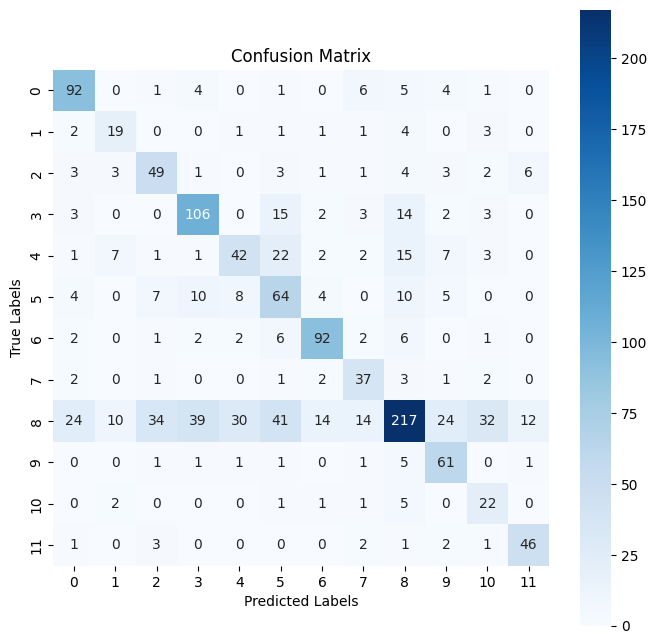

F1 macroScore: 0.60547447033784
F1 microScore: 0.6054324517512509


In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score
from tqdm import tqdm

model = MLPClassifier(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.995)
EPOCHS = 40
SEED = 42
torch.manual_seed(SEED)
torch.use_deterministic_algorithms(True)

for epoch in tqdm(range(EPOCHS)):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()
    
y_pred = []
y_true = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.float(), labels.float()
        outputs = model(inputs)
        max_probs, predicted = torch.max(outputs, 1)
        
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())
cm = confusion_matrix(y_true, y_pred)
labels = label_encoder.inverse_transform(list(range(OUTPUT_SIZE)))
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', square=True)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()
score = f1_score(y_true, y_pred, average='macro')
print("F1 macroScore:", score)
score = f1_score(y_true, y_pred, average='micro')
print("F1 microScore:", score)


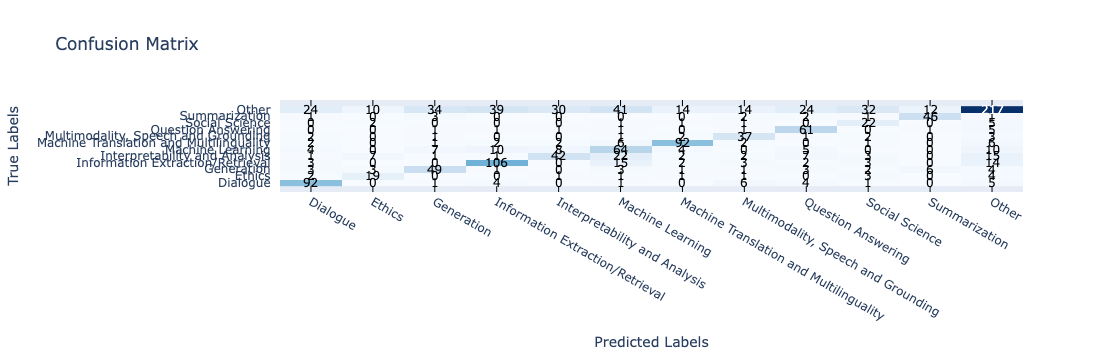

F1 Macro Score: 0.60547447033784
F1 Micro Score: 0.6054324517512509


In [149]:
import plotly.express as px
import plotly.figure_factory as ff
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score

cm = confusion_matrix(y_true, y_pred)
labels = list(label_encoder.inverse_transform(list(range(OUTPUT_SIZE))))

other_label = 'Other'
sorted_labels = sorted([label for label in labels if label != other_label])
sorted_labels.append(other_label)

label_to_sorted_index = {label: index for index, label in enumerate(sorted_labels)}
sorted_cm = np.zeros_like(cm)

for i, label1 in enumerate(labels):
    for j, label2 in enumerate(labels):
        sorted_i = label_to_sorted_index[label1]
        sorted_j = label_to_sorted_index[label2]
        sorted_cm[sorted_i, sorted_j] = cm[i, j]

fig = ff.create_annotated_heatmap(
    z=sorted_cm, 
    x=sorted_labels, 
    y=sorted_labels, 
    colorscale='Blues'
)

fig.update_layout(
    title='Confusion Matrix',
    xaxis=dict(title='Predicted Labels', side='bottom'),
    yaxis=dict(title='True Labels'),
    height=700
)

fig.show()

score_macro = f1_score(y_true, y_pred, average='macro')
print("F1 Macro Score:", score_macro)
score_micro = f1_score(y_true, y_pred, average='micro')
print("F1 Micro Score:", score_micro)


In [155]:
import json

y_true = np.array(y_true).tolist()
y_pred = np.array(y_pred).tolist()

with open('../paper_plots/classifier-evals.json', 'w') as f:
    json.dump({'y_true': y_true, 'y_pred': y_pred, 'sorted_labels': labels}, f)

In [77]:
from sklearn.metrics import f1_score

y_pred = []
y_true = []

n = 0
model.eval()
with torch.no_grad():
    for index, row in df_test.iterrows():
        vector = row['embedding']
        output = model(torch.tensor(vector))
        pred = torch.argmax(output)
        pred = int(output[4] > 0.5)

        if pred and 'analysis' not in row['area'].lower():
            n += 1
            print(row['area'])
            print(row['title'])
            print(row['abstract'])
            print('-' * 100)

n

Discourse and Pragmatics
Facilitating Contrastive Learning of Discourse Relational Senses by Exploiting the Hierarchy of Sense Relations
Implicit discourse relation recognition is a challenging task that involves identifying the sense or senses that hold between two adjacent spans of text, in the absense of an explicit connective between them. In both PDTB-2 (prasad et al., 2008) and PDTB-3 (Webber et al., 2019), discourse relational senses are organized into a three-level hierarchy ranging from four broad top-level senses, to more specific senses below them. Most previous work on implicitf discourse relation recognition have used the sense hierarchy simply to indicate what sense labels were available. Here we do more — incorporating the sense hierarchy into the recognition process itself and using it to select the negative examples used in contrastive learning. With no additional effort, the approach achieves state-of-the-art performance on the task. Our code is released inhttps://git

39

In [78]:
torch.save(model.state_dict(), './general-classifier-weights.pt')